In [4]:
from glob import glob
from pprint import pprint
import matplotlib.pyplot as plt
import random
import cv2
import clip
from PIL import Image
import numpy as np

data = {}
show_result={}
for path in glob('fer/*'):
    dir, collaction = path.split('/')
    data[collaction] = {}
    for cls_path in glob(f'{path}/*'):
        label = cls_path.rsplit('/', 1)[1]
        all_iamges = glob(f'{cls_path}/*')
        data[collaction][label] = len(all_iamges)
        show_result[label] = random.sample(all_iamges, 7)
        
pprint(data['test'])    
pprint(data['train'])    

{'angry': 958,
 'disgust': 111,
 'fear': 1024,
 'happy': 1774,
 'neutral': 1233,
 'sad': 1247,
 'surprise': 831}
{'angry': 3995,
 'disgust': 436,
 'fear': 4097,
 'happy': 7215,
 'neutral': 4965,
 'sad': 4830,
 'surprise': 3171}


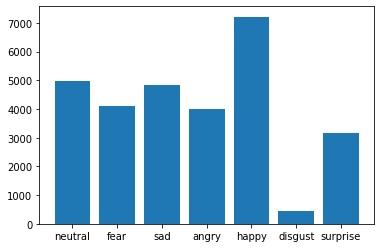

In [2]:

names = list(data['train'].keys())
values = list(data['train'].values())

plt.bar(range(len(data['train'])), values, tick_label=names)
plt.show()

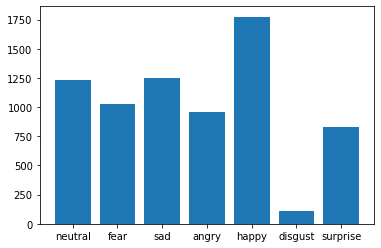

In [3]:

names = list(data['test'].keys())
values = list(data['test'].values())

plt.bar(range(len(data['test'])), values, tick_label=names)
plt.show()

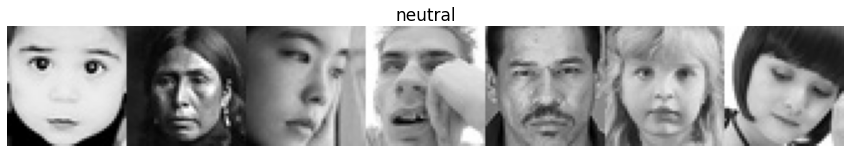

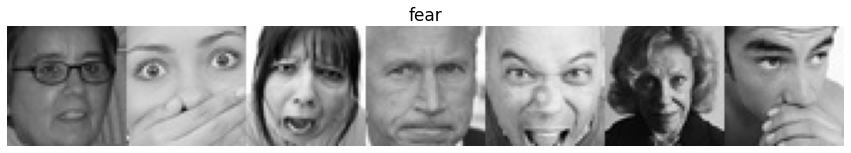

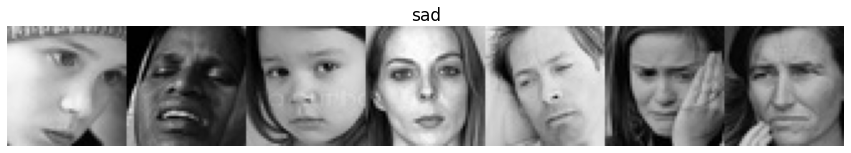

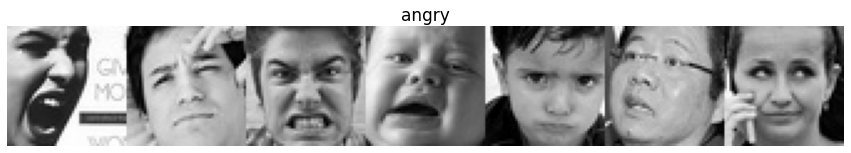

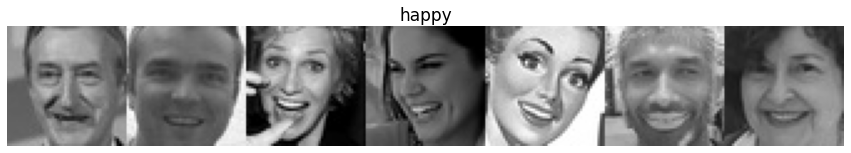

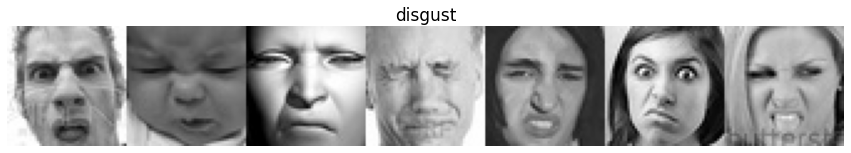

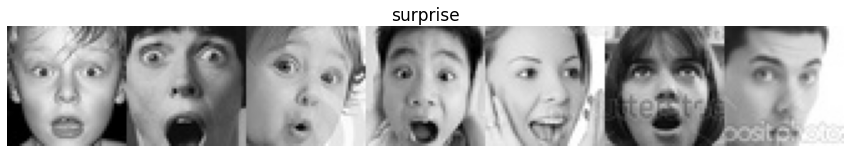

In [4]:
for label, paths in show_result.items():
    images = []
    for path in paths:
        images.append(
            cv2.imread(path)
        )
    img = cv2.hconcat(images) 
    plt.figure(figsize=(15,12))
    plt.imshow(img, cmap='gray')
    plt.title(f'{label}', fontsize=17)
    plt.axis('off')
    plt.show()


# Transformtions

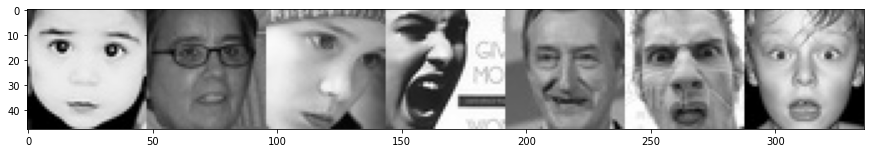

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


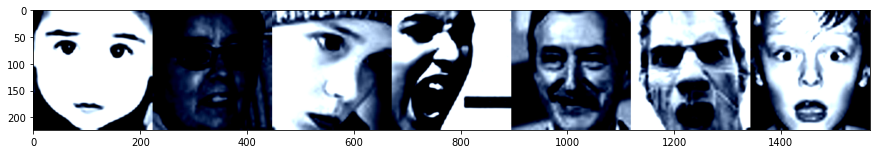

In [25]:
model,preprocess = clip.load('ViT-B/32')
images = []
resized_images = []
for key in show_result.keys():
    path = show_result[key][0]
    image = Image.open(path).convert("RGB")
    img = preprocess(image)
    img = img.permute(1, 2, 0).numpy()
    
    images.append(np.asarray(image))
    resized_images.append(img)
    

plt.figure(figsize=(15,12))
plt.imshow(cv2.hconcat(images), cmap='gray')
plt.show()

plt.figure(figsize=(15,12))
plt.imshow(cv2.hconcat(resized_images), cmap='gray');
plt.show()

# generate unput dictionaries 

In [3]:
for K in range(1, 4):
    for j in range(3):

        print()
        print(f"'fear': {random.sample(['fear', 'nervus', 'scary', 'fright', 'fearness'], k=K)[:K]},")
        print(f"'angry': {random.sample(['angry','frown','furios','annoyed','angered','outraged'], k=K)[:K]},")
        print(f"'sad': {random.sample(['sad','unfortunate','unhappy','tragic','miserable','pitiful'], k=K)[:K]},")
        print(f"'neutral': {random.sample(['neutral','normal','non emotinal','expressionless','blank'], k=K)[:K]},")
        print(f"'surprise': {random.sample(['surprise','shocked','stunned','astonished','amazed'], k=K)[:K]},")
        print(f"'disgust': {random.sample(['disgust','distaste','dislike','rejected'], k=K)[:K]},")
        print(f"'happy': {random.sample(['happy','pleased','delighted','joyful','glad','thrilled'], k=K)[:K]}")
        print()
        print(random.sample([   "this is ____ person", \
                        "person with ____ look ", \
                        "____ face", \
                        "A photo of a ____ face, a type of expression", \
                        "a photo of a ____ looking face."], k=K)[:K])
        
        print()
        print(f'{K}_templates_{K}_labels_{j+1}.pt')
        print()



'fear': ['fear'],
'angry': ['angered'],
'sad': ['sad'],
'neutral': ['expressionless'],
'surprise': ['shocked'],
'disgust': ['distaste'],
'happy': ['delighted']

['____ face']

1_templates_1_labels_1.pt


'fear': ['fearness'],
'angry': ['frown'],
'sad': ['sad'],
'neutral': ['expressionless'],
'surprise': ['amazed'],
'disgust': ['disgust'],
'happy': ['happy']

['person with ____ look ']

1_templates_1_labels_2.pt


'fear': ['scary'],
'angry': ['annoyed'],
'sad': ['unhappy'],
'neutral': ['blank'],
'surprise': ['astonished'],
'disgust': ['dislike'],
'happy': ['happy']

['A photo of a ____ face, a type of expression']

1_templates_1_labels_3.pt


'fear': ['nervus', 'fear'],
'angry': ['frown', 'angry'],
'sad': ['tragic', 'sad'],
'neutral': ['neutral', 'expressionless'],
'surprise': ['shocked', 'amazed'],
'disgust': ['dislike', 'disgust'],
'happy': ['pleased', 'happy']

['a photo of a ____ looking face.', 'person with ____ look ']

2_templates_2_labels_1.pt


'fear': ['fearness', 'scary'],
'

In [ ]:
d ={
    'emotions':{
        'labels':{
            'fear': ['fearfulness', 'fear', 'nervus'],
            'angry': ['angry', 'furios', 'frown'],
            'sad': ['tragic', 'sad', 'unfortunate'],
            'neutral': ['blank', 'neutral', 'expressionless'],
            'surprise': ['stunned', 'amazed', 'shocked'],
            'disgust': ['distaste', 'disgust', 'rejected'],
            'happy': ['happy', 'thrilled', 'delighted']
            },
        'templates':['____ face', \
                     'this is ____ person', \
                     'person with ____ look '],
        'topk':3

    },
   
    'gender':{
        'labels':{
                'male': ['male'],
                'female': ['female']
            },
        'templates':["This is a photo of a ____ person"],
        'topk':1
    }
}  

torch.save(d, '3_templates_3_labels_3.pt')




# plot some confusion results

In [20]:
def show_results(paths, title):
    images = []
    for path in paths:
        images.append(plt.imread(path))


    plt.figure(figsize=(15,12))

    plt.imshow(cv2.hconcat(images), cmap='gray')
    plt.title(title, fontsize=24)
    plt.axis('off')
    plt.show()
    

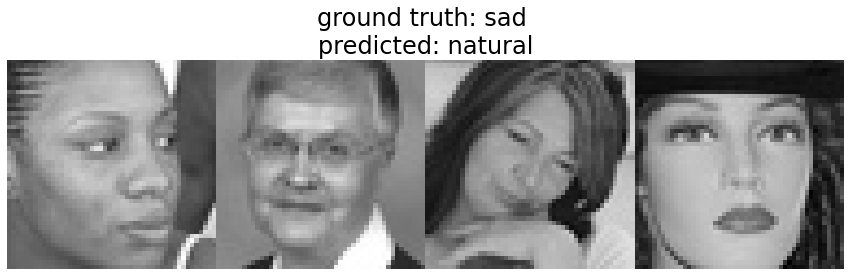

In [22]:
paths = [
    'total_fer/sad/Training_80579424.jpg',
    'total_fer/sad/Training_78711005.jpg',
    'total_fer/sad/Training_86794808.jpg',
    'total_fer/sad/Training_21706684.jpg'
]
show_results(paths, 'ground truth: sad \npredicted: natural')

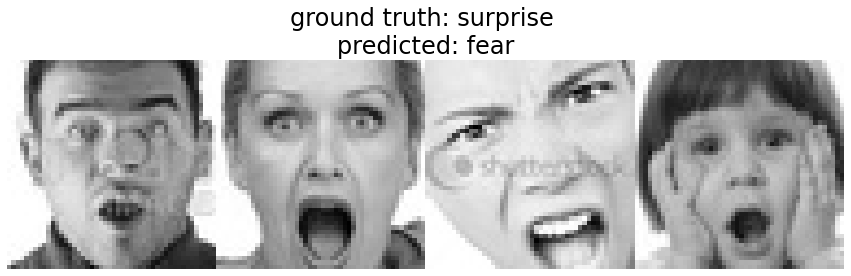

In [28]:
paths = [
    'total_fer/surprise/Training_5688986.jpg',
    'total_fer/surprise/Training_70745147.jpg',
    'total_fer/surprise/Training_1704054.jpg',
    'total_fer/surprise/Training_50984653.jpg'
]
show_results(paths, 'ground truth: surprise \npredicted: fear')

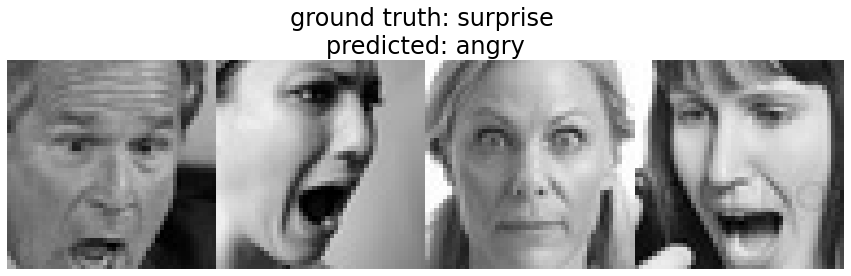

In [30]:
paths = [
    'total_fer/surprise/PublicTest_78180569.jpg',
    'total_fer/surprise/Training_41859921.jpg',
    'total_fer/surprise/Training_70775056.jpg',
    'total_fer/surprise/PrivateTest_43656605.jpg'
]
show_results(paths, 'ground truth: surprise \npredicted: angry')